<a href="https://colab.research.google.com/github/kwakpovwe/kwakpovwe/blob/main/Introduction_to_Neural_Networks_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split



#5)Having uploaded the dataset, we can now use the read_csv function to read it into a pandas dataframe. We can then inspect the first and last rows.

In [5]:
cardio_data = pd.read_csv('Cardiotocographic.csv')

##We can also explore the data  

In [7]:
cardio_data = pd.read_csv('Cardiotocographic.csv')

cardio_data.head()

,BPM,APC,FMPS,UCPS,DLPS,SDPS,PDPS,ASTV,MSTV,ALTV,MLTV,Width,Min,Max,NSP
0,120,0.000000,0.0,0.000000,0.000000,0.0,0.0,73,0.5,43,2.4,64,62,126,2
1,132,0.006380,0.0,0.006380,0.003190,0.0,0.0,17,2.1,0,10.4,130,68,198,1
2,133,0.003322,0.0,0.008306,0.003322,0.0,0.0,16,2.1,0,13.4,130,68,198,1
3,134,0.002561,0.0,0.007682,0.002561,0.0,0.0,16,2.4,0,23.0,117,53,170,1
4,132,0.006515,0.0,0.008143,0.000000,0.0,0.0,16,2.4,0,19.9,117,53,170,1


In [8]:
cardio_data.tail()

,BPM,APC,FMPS,UCPS,DLPS,SDPS,PDPS,ASTV,MSTV,ALTV,MLTV,Width,Min,Max,NSP
2121,140,0.000000,0.000000,0.007426,0.0,0.0,0.0,79,0.2,25,7.2,40,137,177,2
2122,140,0.000775,0.000000,0.006971,0.0,0.0,0.0,78,0.4,22,7.1,66,103,169,2
2123,140,0.000980,0.000000,0.006863,0.0,0.0,0.0,79,0.4,20,6.1,67,103,170,2
2124,140,0.000679,0.000000,0.006110,0.0,0.0,0.0,78,0.4,27,7.0,66,103,169,2
2125,142,0.001616,0.001616,0.008078,0.0,0.0,0.0,74,0.4,36,5.0,42,117,159,1


In [9]:
cardio_data.describe()

,BPM,APC,FMPS,UCPS,DLPS,SDPS,PDPS,ASTV,MSTV,ALTV,MLTV,Width,Min,Max,NSP
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003170,0.009474,0.004357,0.001885,0.000004,0.000157,46.990122,1.332785,9.84666,8.187629,70.445908,93.579492,164.025400,1.304327
std,9.840844,0.003860,0.046670,0.002940,0.002962,0.000063,0.000580,17.192814,0.883241,18.39688,5.628247,38.955693,29.560212,17.944183,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,0.000000,3.000000,50.000000,122.000000,1.000000
25%,126.000000,0.000000,0.000000,0.001876,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,4.600000,37.000000,67.000000,152.000000,1.000000
50%,133.000000,0.001630,0.000000,0.004482,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,7.400000,67.500000,93.000000,162.000000,1.000000
75%,140.000000,0.005631,0.002512,0.006525,0.003264,0.000000,0.000000,61.000000,1.700000,11.00000,10.800000,100.000000,120.000000,174.000000,1.000000
max,160.000000,0.019284,0.480634,0.014925,0.015385,0.001353,0.005348,87.000000,7.000000,91.00000,50.700000,180.000000,159.000000,238.000000,3.000000


In [10]:
cardio_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BPM     2126 non-null   int64  
 1   APC     2126 non-null   float64
 2   FMPS    2126 non-null   float64
 3   UCPS    2126 non-null   float64
 4   DLPS    2126 non-null   float64
 5   SDPS    2126 non-null   float64
 6   PDPS    2126 non-null   float64
 7   ASTV    2126 non-null   int64  
 8   MSTV    2126 non-null   float64
 9   ALTV    2126 non-null   int64  
 10  MLTV    2126 non-null   float64
 11  Width   2126 non-null   int64  
 12  Min     2126 non-null   int64  
 13  Max     2126 non-null   int64  
 14  NSP     2126 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 249.3 KB


In [12]:
cardio_data.shape


(2126, 15)

In [13]:
cardio_data['NSP'].value_counts()


1    1655
2     295
3     176
Name: NSP, dtype: int64

#We can see we have imbalanced classes with 77.8% of the observations belong to the Normal class. We can also use the seaborn countplot to visualise this

<Axes: xlabel='NSP', ylabel='count'>

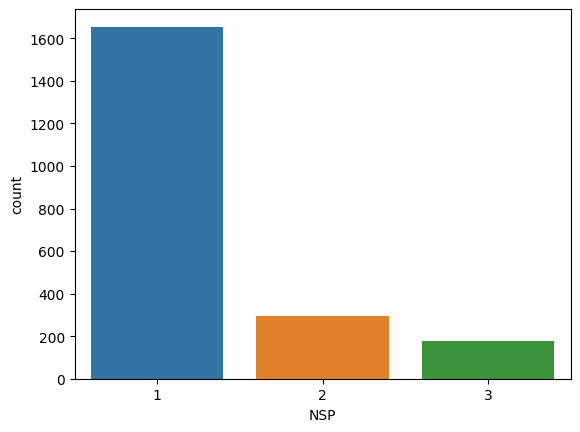

In [18]:
#Using Seaborn to Visualize the Count-Plot

sns.countplot(cardio_data, x="NSP")

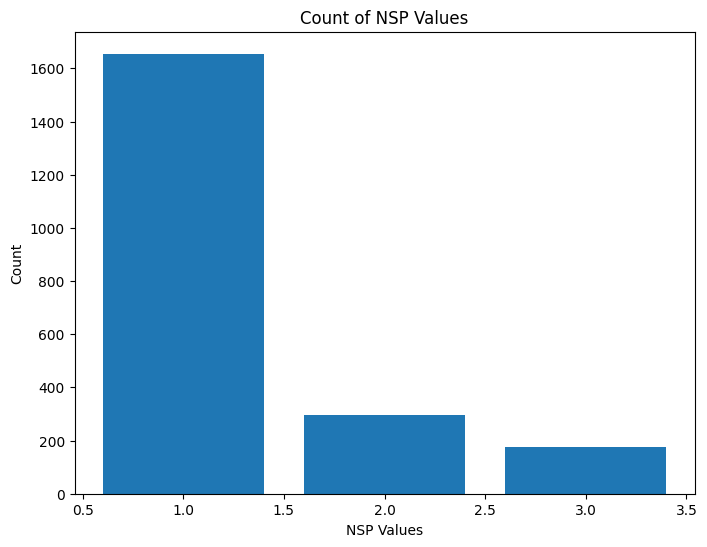

In [17]:
#

import matplotlib.pyplot as plt

# Assuming 'cardio_data' is your DataFrame
value_counts = cardio_data['NSP'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('NSP Values')
plt.ylabel('Count')
plt.title('Count of NSP Values')
plt.show()